In [ ]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
# License: BSD 3 clause
# Modified: Dario H. Romero
# Houston, TX - Feb 2018

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [37]:
# import sys
# !{sys.executable} -m pip install --upgrade pandas --user

Requirement already up-to-date: python-dateutil>=2 in d:\anaconda3\lib\site-packages (from pandas)
Requirement already up-to-date: six>=1.5 in d:\anaconda3\lib\site-packages (from python-dateutil>=2->pandas)


In [39]:
import os
os.getcwd()

'D:\\Users\\drome\\gitrepos\\spe 06\\MannvilleGroup_Strat_Hackathon'

In [89]:
# Load data for fit and predict
f = "./dataset_10aroundPlus3Near_FINAL.csv"
df = pd.read_csv(f)
df.loc[:, 'HorID'] = df.loc[:, 'HorID'].astype('category')
df.dropna(axis=0, inplace=True)

In [90]:
df.drop(['id', 'SitID', 'DPHI', 'GR', 'ILD', 'NPHI', 'Pick',
       'Quality', 'UWI (AGS)', 'UWI', 'Picked', 'DPHI1', 'GR1',
       'ILD1', 'NPHI1', 'DPHI2', 'GR2', 'ILD2', 'NPHI2', 'DPHI3', 'GR3',
       'ILD3', 'NPHI3', 'DPHI4', 'GR4', 'ILD4', 'NPHI4', 'DPHI5', 'GR5',
       'ILD5', 'NPHI5', 'DPHI6', 'GR6', 'ILD6', 'NPHI6', 'DPHI7', 'GR7',
       'ILD7', 'NPHI7', 'DPHI8', 'GR8', 'ILD8', 'NPHI8', 'DPHI9', 'GR9',
       'ILD9', 'NPHI9', 'DPHI10', 'GR10', 'ILD10', 'NPHI10', ], axis=1, inplace=True)

In [91]:
# unique values for HorID
df.HorID.unique()
# df.dtypes

[1000, 4000, 5000, 7000, 11000, ..., 3000, 6000, 9000, 9500, 10000]
Length: 14
Categories (14, int64): [1000, 4000, 5000, 7000, ..., 6000, 9000, 9500, 10000]

In [92]:
# convert HorID from 'object' to 'numeric'
cat_columns = df.select_dtypes(['category']).columns
cat_columns

Index(['HorID'], dtype='object')

In [93]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [94]:
# Save dataset for Nia -- 
df.head()

,DEPT,HorID,lng,lat,DPHI_ner1,GR_ner1,ILD_ner1,NPHI_ner1,DPHI_ner2,GR_ner2,ILD_ner2,NPHI_ner2,DPHI_ner3,GR_ner3,ILD_ner3,NPHI_ner3
0,393.0,0,-114.620656,55.288691,0.389,48.260,2.392,0.649,0.338,59.914,4.215,0.410,0.364,63.731,5.886,0.425
1,549.0,3,-114.620656,55.288691,0.213,67.969,4.029,0.422,0.121,86.346,5.408,0.331,0.586,73.881,1.408,0.606
2,584.0,4,-114.620656,55.288691,0.195,50.241,4.227,0.379,0.299,67.125,12.487,0.400,0.183,102.454,6.332,0.416
3,597.0,6,-114.620656,55.288691,0.173,56.129,4.840,0.362,0.334,94.444,4.500,0.450,0.136,124.856,4.074,0.413
4,607.0,10,-114.620656,55.288691,0.279,54.675,3.501,0.873,0.228,109.653,4.482,0.485,0.180,64.791,8.441,0.369


In [95]:
df.dtypes

DEPT         float64
HorID           int8
lng          float64
lat          float64
DPHI_ner1    float64
GR_ner1      float64
ILD_ner1     float64
NPHI_ner1    float64
DPHI_ner2    float64
GR_ner2      float64
ILD_ner2     float64
NPHI_ner2    float64
DPHI_ner3    float64
GR_ner3      float64
ILD_ner3     float64
NPHI_ner3    float64
dtype: object

In [96]:
from scipy import stats
numeric_cols = df.columns[2:]
numeric_cols
dfn = df[numeric_cols].apply(stats.zscore)

In [97]:
dfn.head()

,lng,lat,DPHI_ner1,GR_ner1,ILD_ner1,NPHI_ner1,DPHI_ner2,GR_ner2,ILD_ner2,NPHI_ner2,DPHI_ner3,GR_ner3,ILD_ner3,NPHI_ner3
0,-2.275674,-0.668888,1.957887,-1.297661,-0.133765,2.835339,1.272832,-0.847193,-0.142611,0.082576,1.555609,-0.666777,-0.110855,0.285496
1,-2.275674,-0.668888,-0.270273,-0.502070,-0.122519,0.215140,-1.434556,0.267507,-0.131620,-0.889107,4.304187,-0.252607,-0.147220,2.565102
2,-2.275674,-0.668888,-0.498153,-1.217694,-0.121159,-0.281197,0.786250,-0.543088,-0.066402,-0.040422,-0.685350,0.913311,-0.107233,0.172145
3,-2.275674,-0.668888,-0.776674,-0.980014,-0.116948,-0.477423,1.222926,0.609019,-0.139985,0.574567,-1.267256,1.827423,-0.125570,0.134362
4,-2.275674,-0.668888,0.565287,-1.038707,-0.126146,5.420910,-0.099577,1.250419,-0.140151,1.005059,-0.722492,-0.623524,-0.090107,-0.419797


In [98]:
dff = pd.merge(df.iloc[:, :2], dfn, how='left', left_index=True, right_index=True)

In [99]:
dff

,DEPT,HorID,lng,lat,DPHI_ner1,GR_ner1,ILD_ner1,NPHI_ner1,DPHI_ner2,GR_ner2,ILD_ner2,NPHI_ner2,DPHI_ner3,GR_ner3,ILD_ner3,NPHI_ner3
0,393.0,0,-2.275674,-0.668888,1.957887,-1.297661,-0.133765,2.835339,1.272832,-0.847193,-0.142611,0.082576,1.555609,-0.666777,-0.110855,0.285496
1,549.0,3,-2.275674,-0.668888,-0.270273,-0.502070,-0.122519,0.215140,-1.434556,0.267507,-0.131620,-0.889107,4.304187,-0.252607,-0.147220,2.565102
2,584.0,4,-2.275674,-0.668888,-0.498153,-1.217694,-0.121159,-0.281197,0.786250,-0.543088,-0.066402,-0.040422,-0.685350,0.913311,-0.107233,0.172145
3,597.0,6,-2.275674,-0.668888,-0.776674,-0.980014,-0.116948,-0.477423,1.222926,0.609019,-0.139985,0.574567,-1.267256,1.827423,-0.125570,0.134362
4,607.0,10,-2.275674,-0.668888,0.565287,-1.038707,-0.126146,5.420910,-0.099577,1.250419,-0.140151,1.005059,-0.722492,-0.623524,-0.090107,-0.419797
5,607.0,11,-2.275674,-0.668888,0.565287,-1.038707,-0.126146,5.420910,-1.097692,0.544116,-0.099587,-0.655411,0.020367,-0.188380,-0.101922,0.688520
6,607.0,12,-2.275674,-0.668888,0.565287,-1.038707,-0.126146,5.420910,-0.623587,0.410261,-0.126912,0.611466,-0.103443,0.340696,-0.107802,1.179706
7,645.0,13,-2.275674,-0.668888,0.261447,1.293611,-0.120431,1.057759,-0.611111,1.716930,-0.121145,-1.012105,-0.103443,0.340696,-0.107802,1.179706
8,209.5,0,-0.791063,1.801036,0.084207,0.430042,-0.115773,-0.084971,-0.548728,1.486627,-0.069571,-1.049004,-0.611064,0.192370,-0.094362,0.675926
9,327.5,1,-0.791063,1.801036,-2.561734,1.389886,-0.071004,-1.573982,0.037664,0.336839,-0.099780,-1.282700,-0.264396,0.204122,-0.094467,0.373657


In [101]:
df = dff.copy(deep=True)
df.to_csv("./dataset_FINAL_toNia_20180227_1020.csv")

In [102]:
target = 'DEPT'
predictors = [x for x in df.columns if x != target]
df.target = df.loc[:, target]
df.data = df.loc[:, predictors]
X, y = shuffle(df.data, df.target, random_state=123)
# train and test sets
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [103]:
predictors = np.asarray(predictors)

In [104]:
# Fit regression model
params = {'n_estimators': 5000, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.001, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.001, loss='ls', max_depth=6,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=5000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [105]:
mae = mean_absolute_error(y_test, clf.predict(X_test))
mse = mean_squared_error(y_test, clf.predict(X_test))
r2_sc = r2_score(y_test, clf.predict(X_test))
print("Mean absolute error: %.4f" % mae)
print("Mean squared error: %.4f" % mse)
print("Variance regression score: %.4f" % r2_sc)

Mean absolute error: 18.8444
Mean squared error: 669.9283
Variance regression score: 0.9704


In [106]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(24, 10))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

Text(0,0.5,'Deviance')

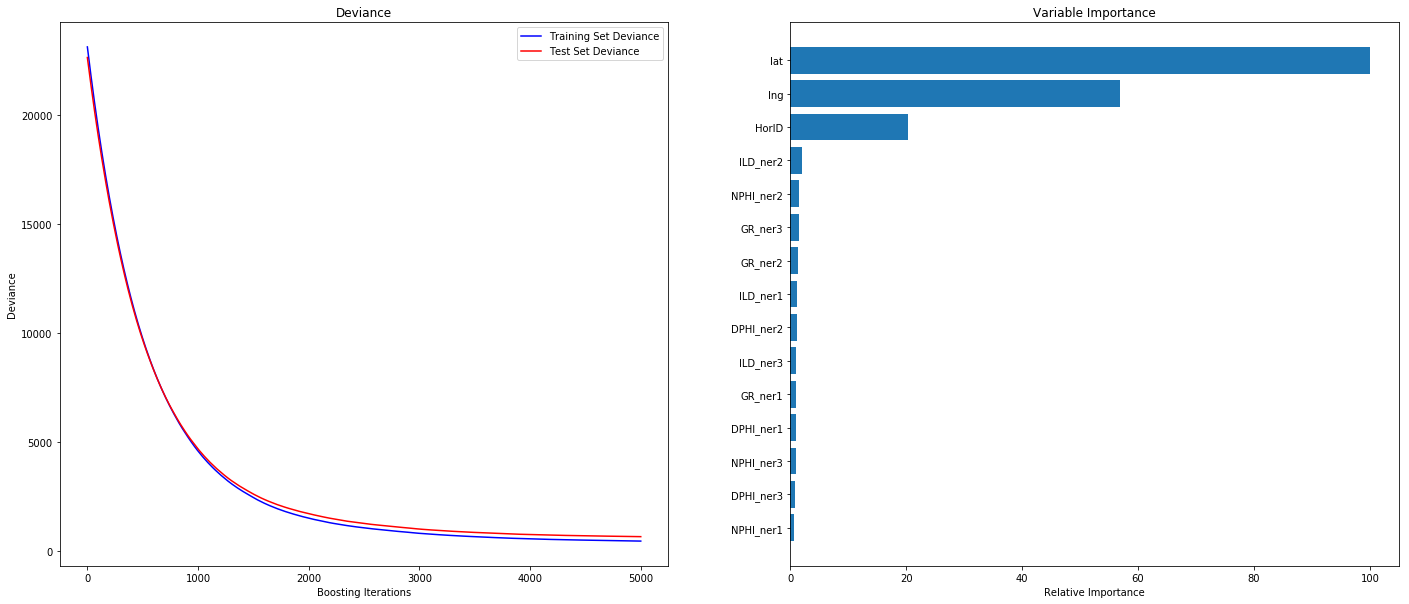

In [107]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, predictors[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
# Load data for evaluate
f = "./dataset_FINAL_20180225_1556_for_Evaluate.csv"
df = pd.read_csv(f).iloc[:, 2:]
df.loc[:, 'HorID'] = df.loc[:, 'HorID'].astype(np.str)
df.dropna(axis=0, inplace=True)

In [ ]:
target = 'DEPT'
predictors = [x for x in df.columns if x != target]
df.target = df.loc[:, target]
df.data = df.loc[:, predictors]

In [ ]:
mae = mean_absolute_error(df.target, clf.predict(df.data))
mse = mean_squared_error(df.target, clf.predict(df.data))
r2_sc = r2_score(df.target, clf.predict(df.data))
print("Mean absolute error: %.4f" % mae)
print("Mean squared error: %.4f" % mse)
print("Variance regression score: %.4f" % r2_sc)

In [ ]:
t = pd.DataFrame(df.target)
e = pd.DataFrame(clf.predict(df.data), columns=['Evaltd'])
pd.concat([t, e], axis=1, join='inner')